In [30]:
# import stuff...
import sys
sys.path.append('/g/g92/yi10')
import os
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import copy


# Define parameters

In [2]:
fpath='/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed'
fname='Deskewed_cell3_Iter_0_ch0_stack0015_3nm_0467863msec_0012700247msecAbs.tif'
fnamem0='MIP_channel0_XY.tif'
fnamem1='MIP_channel0_XZ.tif'
fnamem2='MIP_channel0_YZ.tif'

s=io.imread(os.path.join(fpath,fname))
m0=io.imread(os.path.join(fpath,fnamem0))
m1=io.imread(os.path.join(fpath,fnamem1))
m2=io.imread(os.path.join(fpath,fnamem2))


# Look at MIP in XY, YZ, and XZ

make sure the cells are not closely interacting

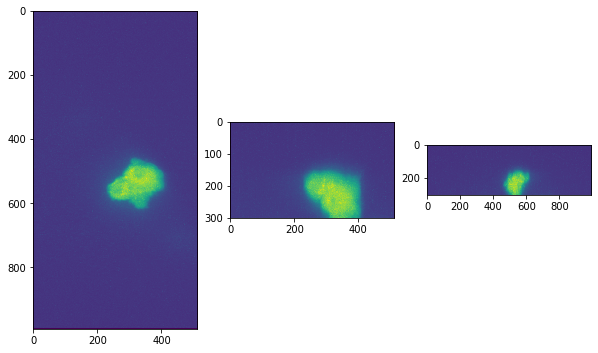

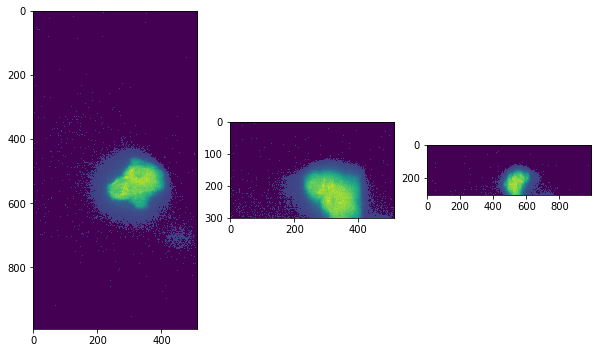

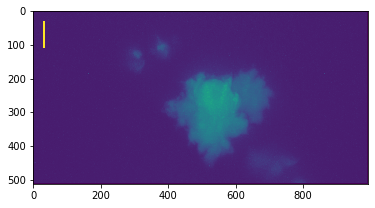

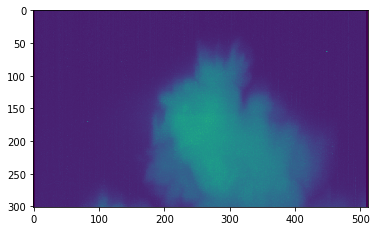

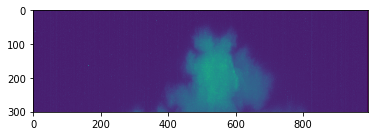

In [3]:
mip_0=np.max(s,axis=0)
mip_1=np.max(s,axis=1)
mip_2=np.max(s,axis=2)

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(mip_0)
plt.subplot(132)
plt.imshow(mip_1)
plt.subplot(133)
plt.imshow(mip_2)

ss=copy.deepcopy(s)
ss[np.where(ss<150)]=0
mip_0=np.max(ss,axis=0)
mip_1=np.max(ss,axis=1)
mip_2=np.max(ss,axis=2)

plt.figure(figsize=(10,15))
plt.subplot(131)
plt.imshow(mip_0)
plt.subplot(132)
plt.imshow(mip_1)
plt.subplot(133)
plt.imshow(mip_2)

k0=np.max(m0,axis=0)
k1=np.max(m1,axis=0)
k2=np.max(m2,axis=0)
plt.figure()
plt.imshow(k0.T)
plt.figure()
plt.imshow(k1)
plt.figure()
plt.imshow(k2)

In [ ]:
# crop a view

In [ ]:
from llsmvis.extensions.HP3D import selectroi
selectroi.select_im(k0,'x')

# load in a volume, perform classification
try k-means first

# inspect and plot voxels with color-coding

# DRAFT

# make the background threadhold based on the derivatives

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

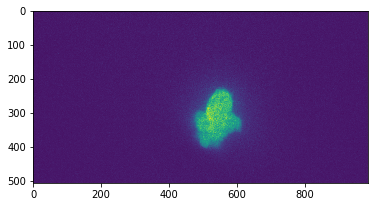

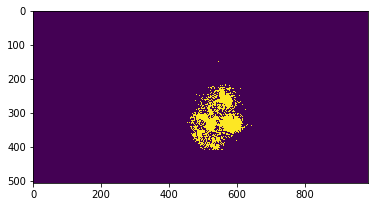

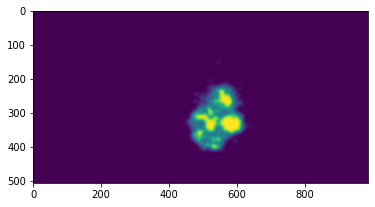

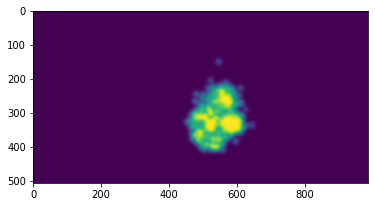

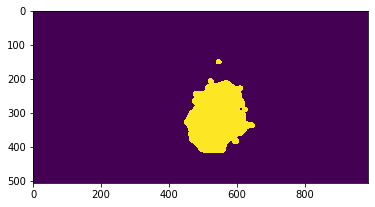

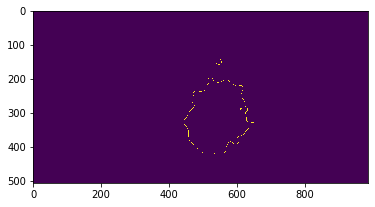

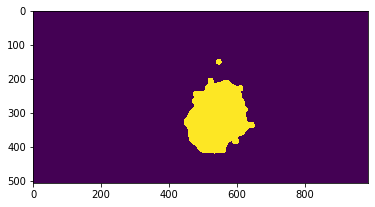

In [7]:
im=np.float32(s[201,3:-3,3:-3])
im=im/np.max(im.ravel())

plt.figure()
plt.imshow(im.T)
edges = canny(im,sigma=0.1)

filled = ndi.binary_fill_holes(edges)
plt.figure()
plt.imshow(filled.T)

bfilled=gaussian_filter(np.float32(filled),sigma=5)
plt.figure()
plt.imshow(bfilled.T)

bf2=(bfilled.T)**0.5
plt.figure()
plt.imshow(bf2)

bf3=bf2>0.1
plt.figure()
plt.imshow(bf3)

eb = canny(bf3,sigma=1)
plt.figure()
plt.imshow(eb)

ef = ndi.binary_fill_holes(eb)
plt.figure()
plt.imshow(ef)


(array([4.59694e+05, 1.43000e+03, 9.38000e+02, 7.12000e+02, 5.87000e+02,
        5.45000e+02, 4.89000e+02, 4.28000e+02, 4.40000e+02, 3.68000e+02,
        3.70000e+02, 3.36000e+02, 3.21000e+02, 3.07000e+02, 2.75000e+02,
        2.65000e+02, 2.59000e+02, 2.61000e+02, 2.37000e+02, 2.42000e+02,
        2.70000e+02, 2.10000e+02, 2.50000e+02, 2.34000e+02, 2.17000e+02,
        2.28000e+02, 2.29000e+02, 2.34000e+02, 2.20000e+02, 2.37000e+02,
        2.20000e+02, 2.25000e+02, 2.36000e+02, 2.61000e+02, 2.54000e+02,
        3.12000e+02, 4.74000e+02, 5.82000e+02, 5.95000e+02, 6.21000e+02,
        6.23000e+02, 6.34000e+02, 5.95000e+02, 5.78000e+02, 5.55000e+02,
        4.97000e+02, 5.53000e+02, 4.51000e+02, 4.53000e+02, 4.68000e+02,
        4.52000e+02, 4.17000e+02, 4.07000e+02, 3.71000e+02, 3.94000e+02,
        3.31000e+02, 3.67000e+02, 3.20000e+02, 2.90000e+02, 3.27000e+02,
        2.98000e+02, 2.71000e+02, 3.09000e+02, 2.56000e+02, 2.74000e+02,
        2.51000e+02, 2.79000e+02, 2.88000e+02, 2.50

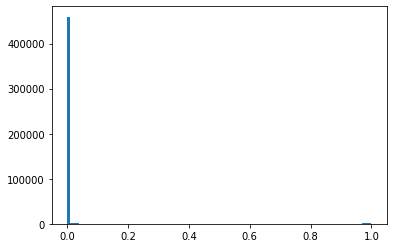

In [152]:
plt.hist(bfilled.ravel(),100)

In [5]:
selectroi.select_im(k0,'x')

NameError: name 'selectroi' is not defined

In [38]:
s2.data

{'x': [], 'y': []}

In [13]:
from matplotlib import cm
from matplotlib import colors
TOOLTIPS = [("x", "$x{int}"), ("y", "$y{int}"), ("value", "@image"),("x", '@lasso_select')]
xdim=k0.shape[0]
ydim=k0.shape[1]
pink_cmap = cm.get_cmap('pink', 256)
pink_cmap256 = pink_cmap(np.linspace(0, 1, 256))
palette = tuple(colors.to_hex(i) for i in pink_cmap256)

p = figure(x_range=(0, xdim), y_range=(0, ydim), tooltips=TOOLTIPS, tools="lasso_select")
p.image(image=[k0], x=0, y=0, dw=xdim, dh=ydim,
        palette=palette, level="image")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
show(p)

GlyphRenderer(id='1284', ...)

In [56]:
k0.callback = CustomJS(args=dict(s2=s2, table=table), code="""
    var inds = cb_obj.selected['1d'].indices;
    var d1 = cb_obj.data;
    var d2 = s2.data;
    d2['x'] = []
    d2['y'] = []
    for (i = 0; i < inds.length; i++) {
        d2['x'].push(d1['x'][inds[i]])
        d2['y'].push(d1['y'][inds[i]])
           }
    s2.trigger('change');
    table.trigger('change');
""")

AttributeError: 'numpy.ndarray' object has no attribute 'callback'

In [59]:
k0.selected.js_on_change('indices', CustomJS(args=dict(s1=s1, s2=s2, table=table), code="""
        var inds = cb_obj.indices;
        var d1 = s1.data;
        var d2 = s2.data;
        d2['x'] = []
        d2['y'] = []
        for (var i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        }
        s2.change.emit();
        table.change.emit();
    """)
)

AttributeError: 'numpy.ndarray' object has no attribute 'selected'

Loading BokehJS ...

Loading BokehJS ...

In [47]:
fpath='/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed'

# define the MIP file names for channel0
fnamem0='MIP_channel0_XY.tif'
fnamem1='MIP_channel0_XZ.tif'
fnamem2='MIP_channel0_YZ.tif'

# read in the MIP stacks
m0=io.imread(os.path.join(fpath,fnamem0))
m1=io.imread(os.path.join(fpath,fnamem1))
m2=io.imread(os.path.join(fpath,fnamem2))

# calculate the matrixes for the time maximum of the 
# mip movies to capture the full span of the cell movement.
tmXY=np.max(m0,axis=0)
tmXZ=np.max(m1,axis=0)
tmYZ=np.max(m2,axis=0)

In [51]:
select_im(tmXY,fnamehead='NewTest',txtstr='XY',datapath='./asdfas;kfja;lskjdf/asdfasdflk/axxtest.',exportdinfo=True)

Loading BokehJS ...

In [12]:
dict(np.ndarray([4,2],dtype='float32'))

{6.080739e-13: 1.5305e-41,
 50602432000000.0: 3.0611e-41,
 5.6e-44: 1.54e-43,
 1.57e-43: 6.4e-44}

In [16]:
x=np.ndarray([4,2],dtype='float32')

In [21]:
m=list(x)

In [26]:
m[0]=['a',1]

In [27]:
m=[];
m.append(['a',0])
m.append(['b',1])
m.append(['c',2])
m.append(['d',3])


In [28]:
dict(m)

{'a': 0, 'b': 1, 'c': 2, 'd': 3}

In [37]:
dict([])

{}